G2M insight for Cab Investment firm

In [120]:
#imporating libraries.
import numpy as np 
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime
from sklearn.preprocessing import LabelEncoder

DATASET OVERVIEW

1. Cab_Data.csv – this file includes details of transaction for 2 cab companies

1. Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

1. Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

1. City.csv – this file contains list of US cities, their population and number of cab users

* Transaction ID- a unique identifier for each transaction 
* Date of Travel- the date the ride occurred
* Company- the name of the company that supplied the cab for the travel

* KM Travelled- the distance travelled by cab in kilometres.

* Price Charged- the price charged to the consumer for the ride.

* Cost of Trip- the real cost of the trip (no profit or loss is added)

CAB DATASET


In [35]:
cabdata = pd.read_csv('Cab_Data.csv')

In [36]:
#missing value
missing_val = 0
for column in cabdata.columns :
    missing_val += cabdata[column].isna().sum() + cabdata[column].isnull().sum()
print('CabData dataset has {} entries , {} features and {} missing values'.format(cabdata.shape[0] ,cabdata.shape[1] ,missing_val))
print("\nFeature's datatypes\n\n{}".format(cabdata.dtypes))
cabdata.head(10)

CabData dataset has 359392 entries , 7 features and 0 missing values

Feature's datatypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,07-01-2016,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,03-01-2016,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,07-01-2016,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,12-01-2016,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,06-01-2016,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [37]:
citydata = pd.read_csv('City.csv')
missing_val = 0
for column in citydata.columns :
    missing_val += citydata[column].isna().sum() + citydata[column].isnull().sum()
print('citydata dataset has {} entries , {} features and {} missing values'.format(citydata.shape[0] ,citydata.shape[1] ,missing_val))
print("\nFeature's datatypes\n\n{}".format(citydata.dtypes))
citydata.head(10)

citydata dataset has 20 entries , 3 features and 0 missing values

Feature's datatypes

City          object
Population    object
Users         object
dtype: object


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [38]:
Custdata = pd.read_csv('Customer_ID.csv')
missing_val = 0
for column in Custdata.columns :
    missing_val += Custdata[column].isna().sum() + Custdata[column].isnull().sum()
print('Custdata dataset has {} entries , {} features and {} missing values'.format(Custdata.shape[0] ,Custdata.shape[1] ,missing_val))
print("\nFeature's datatypes\n\n{}".format(Custdata.dtypes))
Custdata.head(10)

Custdata dataset has 49171 entries , 4 features and 0 missing values

Feature's datatypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [39]:
Transcdata = pd.read_csv('Transaction_ID.csv')
missing_val = 0
for column in Transcdata.columns :
    missing_val += Transcdata[column].isna().sum() + Transcdata[column].isnull().sum()
print('Transcdata dataset has {} entries , {} features and {} missing values'.format(Transcdata.shape[0] ,Transcdata.shape[1] ,missing_val))
print("\nFeature's datatypes\n\n{}".format(Transcdata.dtypes))
Transcdata.head(10)

Transcdata dataset has 440098 entries , 3 features and 0 missing values

Feature's datatypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [40]:
for col in cabdata.columns:
    if ' ' in col:
        cabdata = cabdata.rename(columns={col:col.replace(' ','_')})
for col in Custdata.columns:
    if ' ' in col:
        Custdata = Custdata.rename(columns={col:col.replace(' ','_')})
for col in citydata.columns:
    if ' ' in col:
        citydata = citydata.rename(columns={col:col.replace(' ','_')})
for col in Transcdata.columns:
    if ' ' in col:
        Transcdata = Transcdata.rename(columns={col:col.replace(' ','_')})

In [41]:
datasets = [cabdata, citydata, Custdata, Transcdata]
datasets_name = ['Cab', 'City', 'Customer', 'Transaction']

In [42]:
def divided_plot(dataset, title, x, x_label, color):
    plt.figure(figsize=(14,6))
    ax=sns.histplot(data = dataset, x=x,bins=40, color= color)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel(x_label)


def data_call(dataset, name):
    print(f'For DataSet :{name}')
    print(f'-------------//Shape of dataset- {name} ')
    print(dataset.shape)
    print(f'-------------//Columns in dataset- {name} ')
    print(dataset.columns)
    print(f'-------------//Info for dataset- {name} ')
    print(dataset.info())
    print(f'-------------//Null Values for dataset- {name}')
    print(dataset.isnull().sum())
    print(f'-------------//Description of dataset- {name}')
    print(dataset.describe())
    print('*******')
   
    
    
def plot(group, title):
    plt.figure(figsize=(14,6))
    sns.barplot(x=group.index,y=group.values)     
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
    


In [43]:
data_call(cabdata, 'Cab Dataset')

For DataSet :Cab Dataset
-------------//Shape of dataset- Cab Dataset 
(359392, 7)
-------------//Columns in dataset- Cab Dataset 
Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')
-------------//Info for dataset- Cab Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  359392 non-null  int64  
 1   Date_of_Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM_Travelled    359392 non-null  float64
 5   Price_Charged   359392 non-null  float64
 6   Cost_of_Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
None
-------------//Null Values for dataset- Cab Dataset
Transaction_ID    0
Date_of_Travel    

In [44]:
cabdata['Date_of_Travel'] = pd.to_datetime(cabdata['Date_of_Travel'])
cabdata['Year'] = cabdata['Date_of_Travel'].dt.year 
cabdata['Month'] = cabdata['Date_of_Travel'].dt.month 

cabdata = cabdata.drop(['Date_of_Travel'], axis =1 )

cabdata['Profit'] = cabdata['Price_Charged'] - cabdata['Cost_of_Trip'] 
cabdata['ProfitPercentage'] = ((cabdata['Price_Charged'] - cabdata['Cost_of_Trip'])/cabdata['Cost_of_Trip'])*100

In [45]:
cabdata.replace([np.inf, -np.inf], np.nan)
cabdata['Profit_per_KM'] = cabdata['Profit']/ cabdata['KM_Travelled']


In [46]:
months = cabdata.groupby(['Month']).Transaction_ID.count()
years = cabdata.groupby(['Year']).Transaction_ID.count()
cab_company = cabdata.groupby(['Company']).Transaction_ID.count()
city = cabdata.groupby(['City']).Transaction_ID.count()

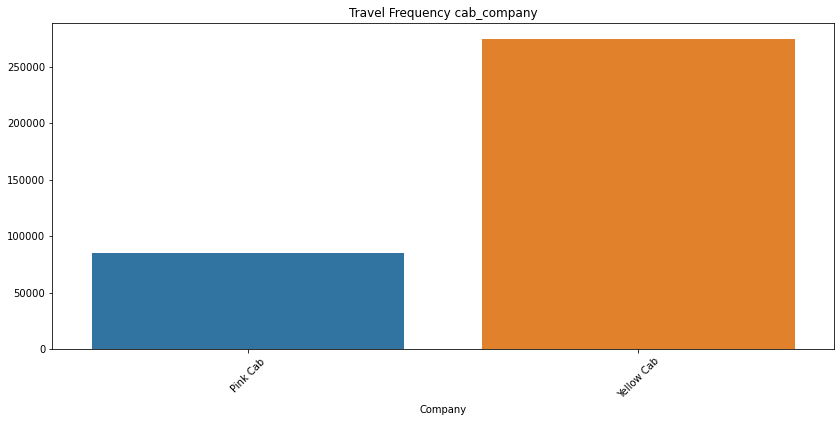

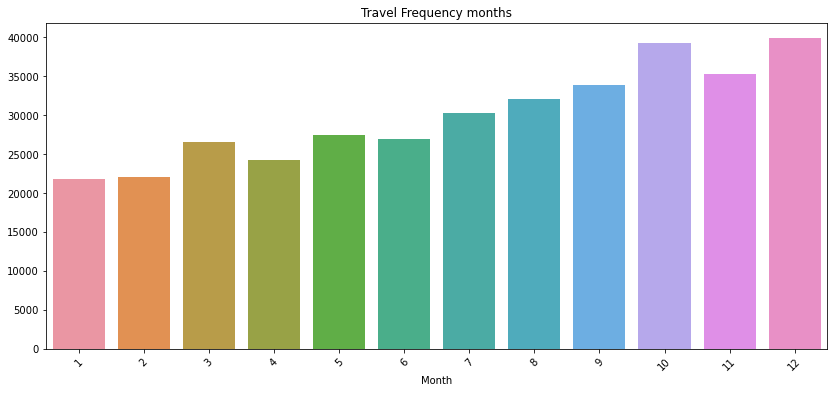

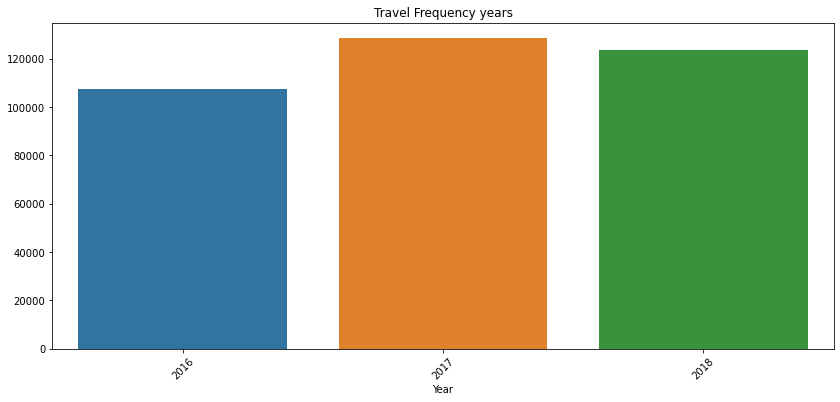

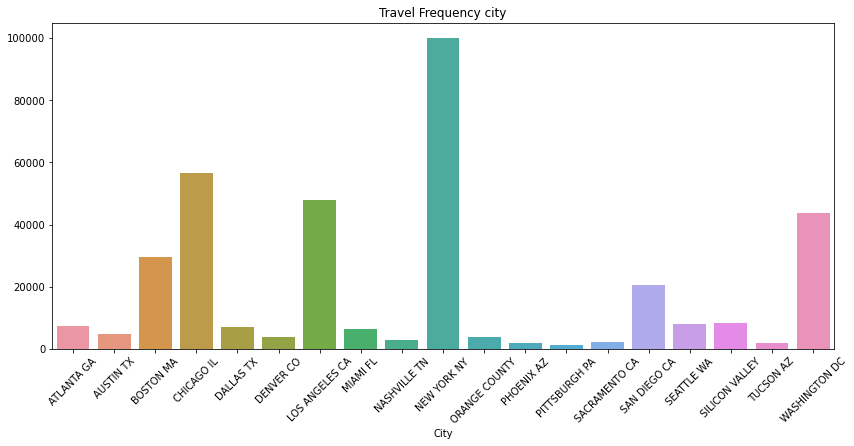

In [47]:
groups = [cab_company, months, years,city]
names = ['cab_company', 'months', 'years','city']
i=0    
for group in groups:
    title = 'Travel Frequency ' + names[i]
    plot(group, title)
    i +=1

In [48]:
cabdata.head(8)

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,8,57.315,18.274427,1.882266
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,6,23.666,7.067558,0.826904
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,2,27.568,28.236644,3.049558
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,7,25.798,7.337273,0.777751
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,3,16.844,17.227131,1.929439
5,10000016,Pink Cab,ATLANTA GA,6.06,72.43,63.024,2016,7,9.406,14.924473,1.552145
6,10000017,Pink Cab,AUSTIN TX,44.00,576.15,475.200,2016,3,100.950,21.243687,2.294318
7,10000018,Pink Cab,AUSTIN TX,35.65,466.10,377.890,2016,7,88.210,23.342772,2.474334


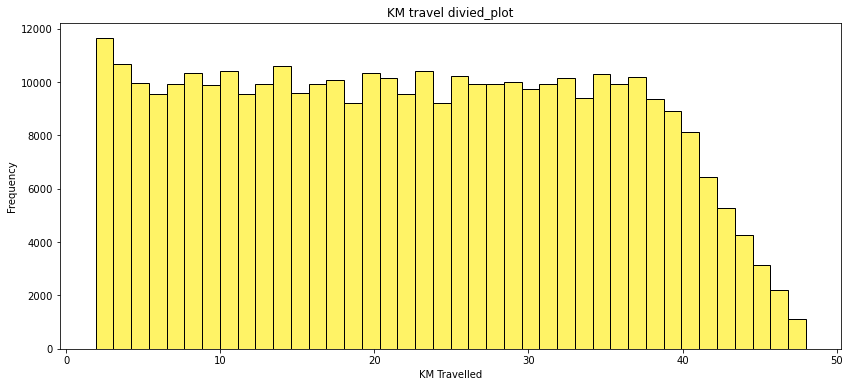

In [49]:
divided_plot(cabdata, 'KM travel divied_plot', 'KM_Travelled', 'KM Travelled', '#FFF033' )

The number of rides gradually decreases after 40 kilometres.

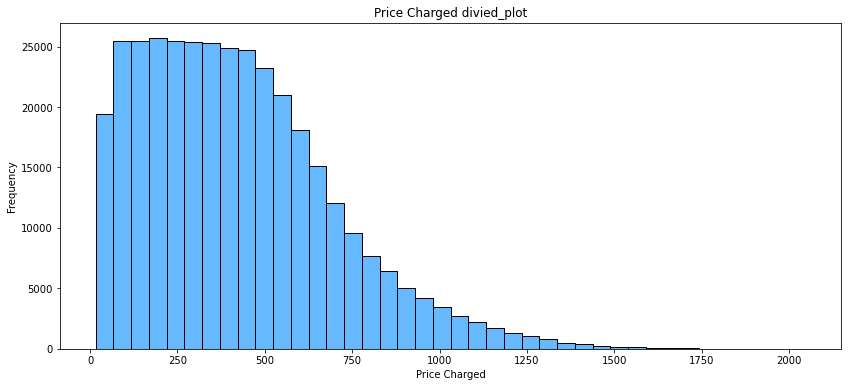

In [50]:
divided_plot(cabdata, 'Price Charged divied_plot', 'Price_Charged', 'Price Charged', '#33A2FF' )

The number of rides decreases exponentially beyond 400.

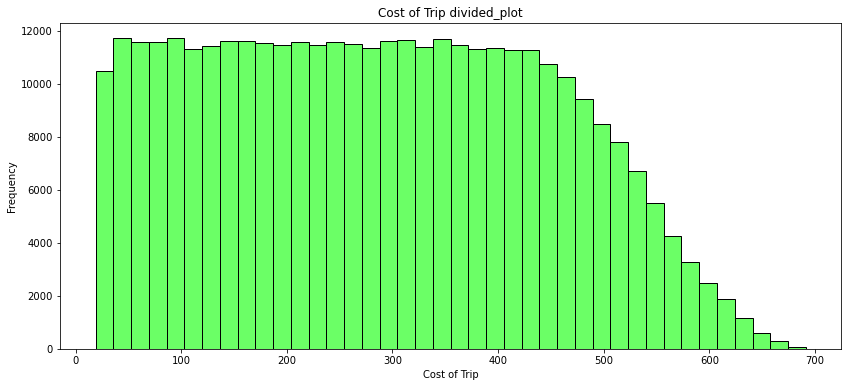

In [51]:
divided_plot(cabdata, 'Cost of Trip divided_plot', 'Cost_of_Trip', 'Cost of Trip', '#39FF33' )

After about 420, the number of rides decreases linearly until it approaches zero around 700.

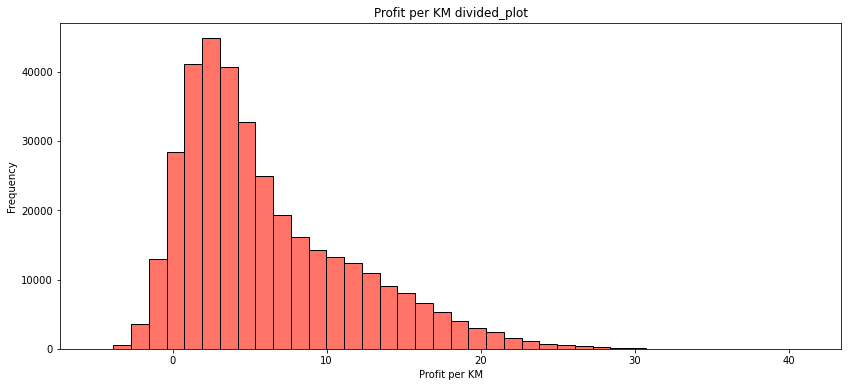

In [52]:
divided_plot(cabdata, 'Profit per KM divided_plot', 'Profit_per_KM', 'Profit per KM', '#FF4633' )

Profit per kilometre is tilted to the right, with a few exceptions.

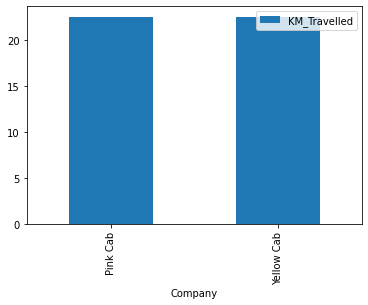

            KM_Travelled
Company                 
Pink Cab       22.559917
Yellow Cab     22.569517


In [53]:
cab1 = cabdata[["Company", "KM_Travelled"]]
new_df = (cab1.groupby("Company").mean()).sort_values(by="KM_Travelled")

#visualization
ax = new_df.plot(kind='bar',stacked = False)
plt.show()
print(new_df)

Both firms have the same average number of kilometres travelled.

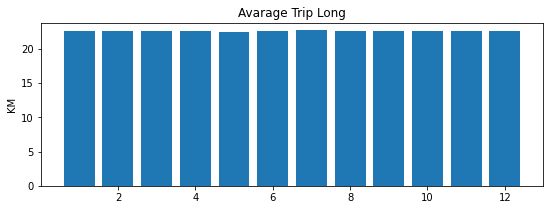

       KM_Travelled
Month              
5         22.405801
9         22.527838
8         22.537612
6         22.554316
3         22.555264
2         22.569511
4         22.581677
10        22.593497
11        22.597415
1         22.603980
12        22.604417
7         22.653659


In [54]:
cab2 = cabdata[["Month", "KM_Travelled"]]
new_df2 = (cab2.groupby("Month").mean()).sort_values(by="KM_Travelled")

#visualization
plt.figure(figsize = (9,3))
plt.bar(new_df2.index,new_df2["KM_Travelled"])
plt.ylabel("KM")
plt.title("Avarage Trip Long")
plt.show()

print(new_df2)

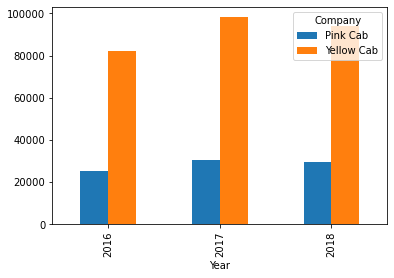

Company  Pink Cab  Yellow Cab
Year                         
2016        25080       82239
2017        30321       98189
2018        29310       94253


In [55]:
total = cabdata.groupby(['Year','Company']).Transaction_ID.count().unstack()
ax = total.plot(kind='bar',stacked = False)
plt.show()
print(total)

Pink cabs provide an average of 23% of overall cab count across the three years.

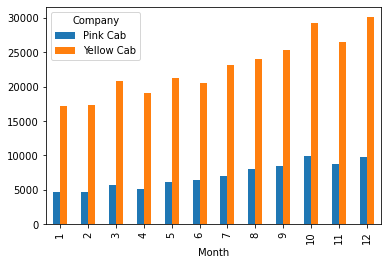

Company  Pink Cab  Yellow Cab
Month                        
1            4734       17108
2            4693       17338
3            5724       20754
4            5118       19077
5            6150       21309
6            6371       20568
7            7048       23177
8            8011       24027
9            8518       25377
10           9936       29273
11           8679       26538
12           9729       30135


In [56]:
Total1 = cabdata.groupby(['Month','Company']).Transaction_ID.count().unstack()
ax = Total1.plot(kind='bar',stacked = False)
plt.show()
print(Total1)

Pink Cab's percantage contribution to the number of taxis remains consistent across all months.


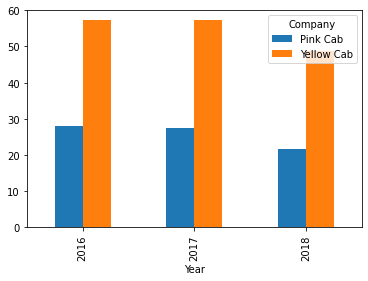

Company   Pink Cab  Yellow Cab
Year                          
2016     27.910304   57.214209
2017     27.319440   57.244999
2018     21.727509   48.679429


In [57]:
total3 = cabdata.groupby(['Year','Company']).ProfitPercentage.mean().unstack()
ax = total3.plot(kind='bar',stacked = False)
plt.show()
print(total3)

Pink Cab's average profit over the last three years has been about 17-18.
Yellow Cab's average profit over the last three years has been about 28-31.

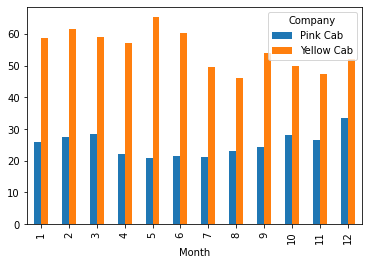

Company   Pink Cab  Yellow Cab
Month                         
1        25.788607   58.576844
2        27.499876   61.410604
3        28.448711   58.920636
4        22.125875   57.052153
5        20.698423   65.309188
6        21.470962   60.316722
7        21.302683   49.538838
8        23.070940   46.064588
9        24.195375   54.085749
10       27.928672   49.722187
11       26.574888   47.300809
12       33.371083   51.953357


In [58]:
total3 = cabdata.groupby(['Month','Company']).ProfitPercentage.mean().unstack()
ax = total3.plot(kind='bar',stacked = False)
plt.show()
print(total3)

Pink Cab's profit percentage was highest in March and December, while it was lowest in June and July.
Yellow Cab's profit percentage was highest in May, February, and January, and lowest in August and July.

In [59]:
total = cabdata.groupby(['Year','Company']).Profit.mean().unstack()
print(total)
total = cabdata.groupby(['Month','Company']).ProfitPercentage.mean().unstack()
print(total)

Company   Pink Cab  Yellow Cab
Year                          
2016     68.321819  169.347821
2017     67.070839  168.817057
2018     53.229689  143.416122
Company   Pink Cab  Yellow Cab
Month                         
1        25.788607   58.576844
2        27.499876   61.410604
3        28.448711   58.920636
4        22.125875   57.052153
5        20.698423   65.309188
6        21.470962   60.316722
7        21.302683   49.538838
8        23.070940   46.064588
9        24.195375   54.085749
10       27.928672   49.722187
11       26.574888   47.300809
12       33.371083   51.953357


Unlike Profit Percentage, Pink Cab's biggest profit average is in December and its lowest from May to July > In contrast to Profit Percentage, Yellow Cab's biggest profit average is in January and February, and its lowest in August.

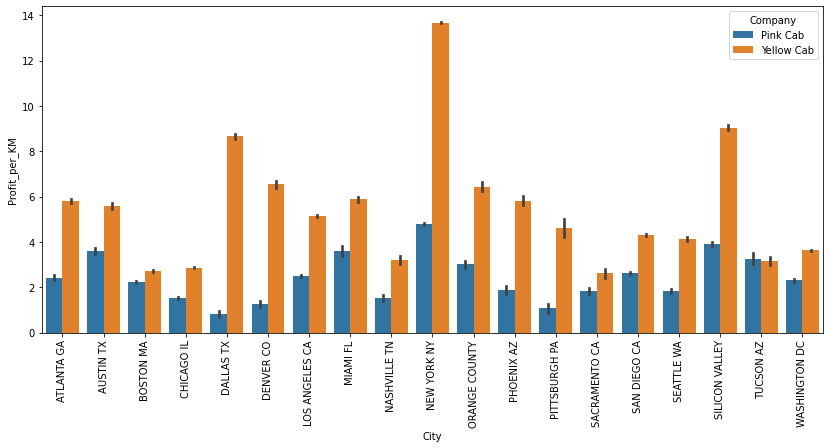

In [60]:
df = cabdata.groupby(['City', 'Company']).agg(Profit_per_KM = ("Profit_per_KM", 'mean'))
df = cabdata.reset_index()
dims = (14, 6)
fig, ax = plt.subplots(figsize= dims)
# plot barplot
g = sns.barplot(x="City", y="Profit_per_KM", hue="Company", ax=ax, data=df);
var = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In the accompanying Profit per KM graph, New York offers the highest earnings in terms of distance for both firms.
Dallas has the lowest profit per kilometre for Pink Cab, and Sacramento has the same for Yellow Cab.

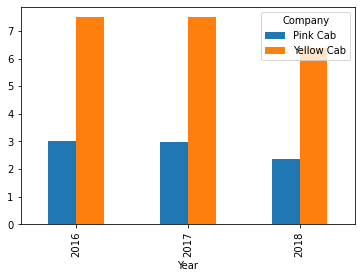

Company  Pink Cab  Yellow Cab
Year                         
2016     3.026813    7.489847
2017     2.962883    7.494612
2018     2.350447    6.364805


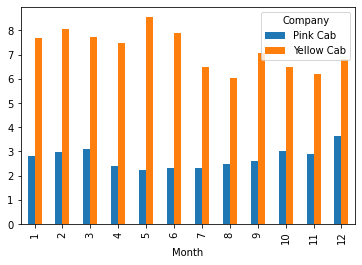

Company  Pink Cab  Yellow Cab
Month                        
1        2.793438    7.665865
2        2.979268    8.044605
3        3.092925    7.714993
4        2.393796    7.466042
5        2.234797    8.552041
6        2.320152    7.897677
7        2.303050    6.478925
8        2.496543    6.022029
9        2.620842    7.080664
10       3.024953    6.504155
11       2.884635    6.183048
12       3.629052    6.798749


In [61]:
counts = cabdata.groupby(['Year','Company']).Profit_per_KM.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

counts = cabdata.groupby(['Month','Company']).Profit_per_KM.mean().unstack()
ax = counts.plot(kind='bar',stacked = False)
plt.show()
print(counts)

The average distance travelled remains constant throughout the course of three years and about 12 months.

### Customer_ID

1. Customer ID = A unique identifier number assigned to each passenger.
1. Gender = Each passenger's gender (Male/Female)
1. Age = Each passenger's age
1. Income (USD/Month) = Amount of money for each passenger

In [62]:
Custdata = Custdata.rename(columns={'Income_(USD/Month)': 'Monthly_income'})

In [64]:
data_call(Custdata, 'Customer Dataset')

For DataSet :Customer Dataset
-------------//Shape of dataset- Customer Dataset 
(49171, 4)
-------------//Columns in dataset- Customer Dataset 
Index(['Customer_ID', 'Gender', 'Age', 'Monthly_income'], dtype='object')
-------------//Info for dataset- Customer Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer_ID     49171 non-null  int64 
 1   Gender          49171 non-null  object
 2   Age             49171 non-null  int64 
 3   Monthly_income  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
-------------//Null Values for dataset- Customer Dataset
Customer_ID       0
Gender            0
Age               0
Monthly_income    0
dtype: int64
-------------//Description of dataset- Customer Dataset
        Customer_ID           Age  Monthly_income
count  49171.000000  49171.000000    49171.0000

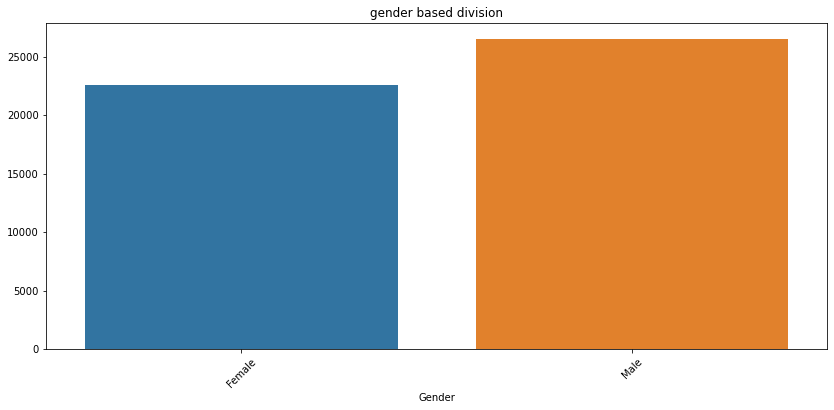

In [66]:
group = Custdata.groupby(['Gender']).Customer_ID.count()
plot(group, 'gender based division')

We have a higher proportion of male passengers/customers.

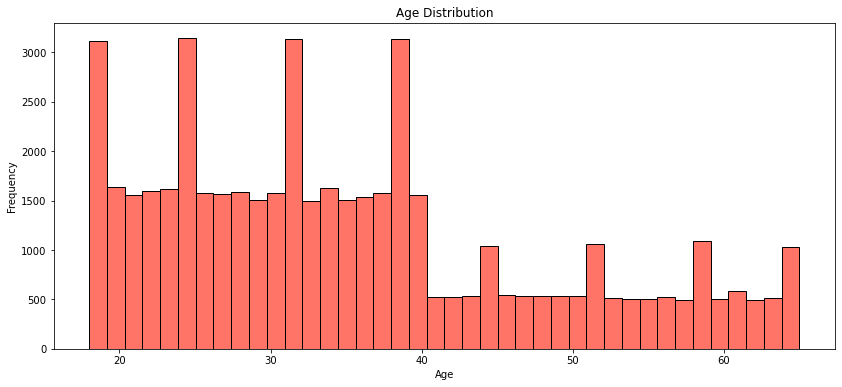

In [68]:

divided_plot(Custdata, 'Age Distribution', 'Age', 'Age', '#FF4633' )
age = Custdata.groupby(['Age']).Customer_ID.count()


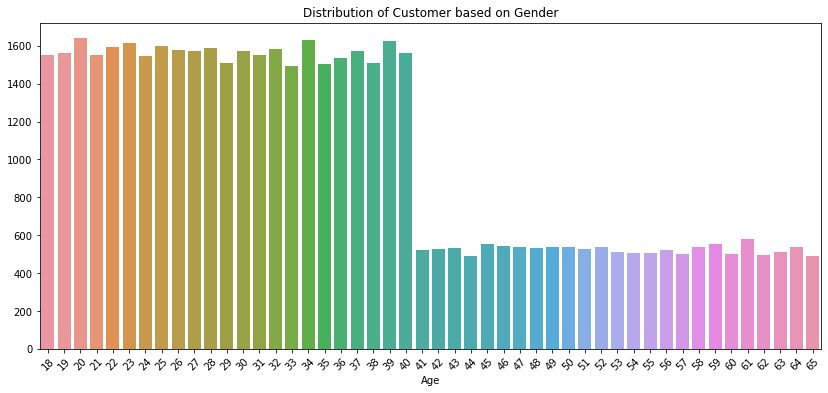

In [69]:
plot(age, 'Distribution of Customer based on Gender')

The number of travellers drops precipitously beyond the age of 40. Customers under the age of 40 constitute a bigger proportion of the total. 

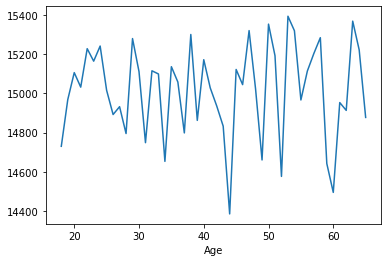

Max Income in the table is  35000
Min Income in the table is  2000


In [72]:
numb = Custdata.groupby(['Age']).Monthly_income.mean()
ax = numb.plot(kind='line',stacked = False)
plt.show()

print('Max Income in the table is ',Custdata['Monthly_income'].max())
print('Min Income in the table is ',Custdata['Monthly_income'].min())

The average income of our consumers of all ages is consistent.

In [80]:
print(Custdata.groupby(['Gender','Age']).Monthly_income.mean())


Gender  Age
Female  18     14559.172554
        19     14943.423410
        20     15117.543860
        21     15172.203812
        22     15094.283444
                   ...     
Male    61     15027.250000
        62     14995.261364
        63     15624.091549
        64     14779.901695
        65     14816.531250
Name: Monthly_income, Length: 96, dtype: float64


The average income for both guys and girls is almost the same (14k to 15k).

### Transaction ID 
1. Transaction_ID = A unique identifier number assigned to each transaction passanger.
1. Customer_ID = A unique identifier number assigned to each passenger.
1. Payment_Mode = Payment type, which might be cash or a credit card.

In [81]:
Transcdata.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [82]:
data_call(Transcdata, 'Transaction Dataset')

For DataSet :Transaction Dataset
-------------//Shape of dataset- Transaction Dataset 
(440098, 3)
-------------//Columns in dataset- Transaction Dataset 
Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')
-------------//Info for dataset- Transaction Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction_ID  440098 non-null  int64 
 1   Customer_ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None
-------------//Null Values for dataset- Transaction Dataset
Transaction_ID    0
Customer_ID       0
Payment_Mode      0
dtype: int64
-------------//Description of dataset- Transaction Dataset
       Transaction_ID    Customer_ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   

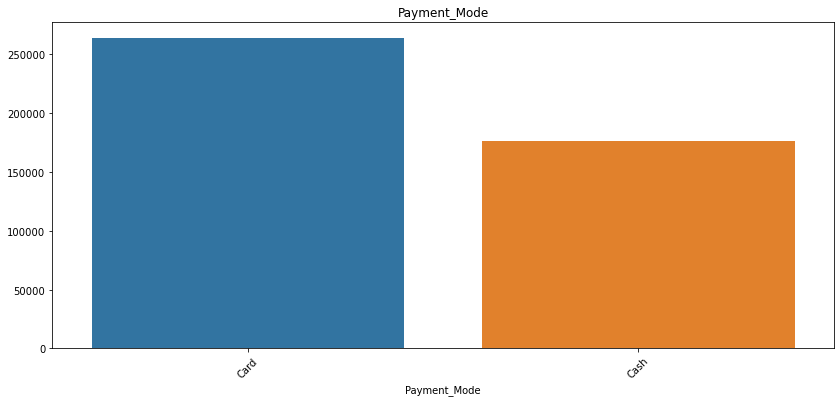

In [89]:
type_payment = Transcdata.groupby(['Payment_Mode']).Transaction_ID.count()
plot(type_payment, 'Payment_Mode')

Customers prefer to pay using a credit card, which they use over 60% of the time.

### City 
1. City = Names of cities
1. Population = City Population
1. Users = Number of taxi users in each city

In [88]:
data_call(citydata, 'City Dataset')

For DataSet :City Dataset
-------------//Shape of dataset- City Dataset 
(20, 3)
-------------//Columns in dataset- City Dataset 
Index(['City', 'Population', 'Users'], dtype='object')
-------------//Info for dataset- City Dataset 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
-------------//Null Values for dataset- City Dataset
City          0
Population    0
Users         0
dtype: int64
-------------//Description of dataset- City Dataset
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1
*******


In [90]:
citydata.head()



,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [91]:
citydata['Population'] = citydata["Population"].str.strip().str.replace(",","") 
citydata['Users'] = citydata["Users"].str.strip().str.replace(",","")

In [92]:
citydata.head()


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [94]:
users = list(citydata["Users"].str.strip().str.replace(",",""))
citydata['Users'] = users
users=[]
for i in citydata['Users']:
    i = float(i)
    users.append(i)
citydata['Users'] = users

In [93]:
population = list(citydata["Population"].str.strip().str.replace(",",""))
citydata['Population'] = population
population = []
for i in citydata['Population']:
    i = float(i)
    population.append(i)
citydata['Population'] = population

In [96]:
citydata['User_percent'] = (citydata['Users']/ citydata['Population'])*100

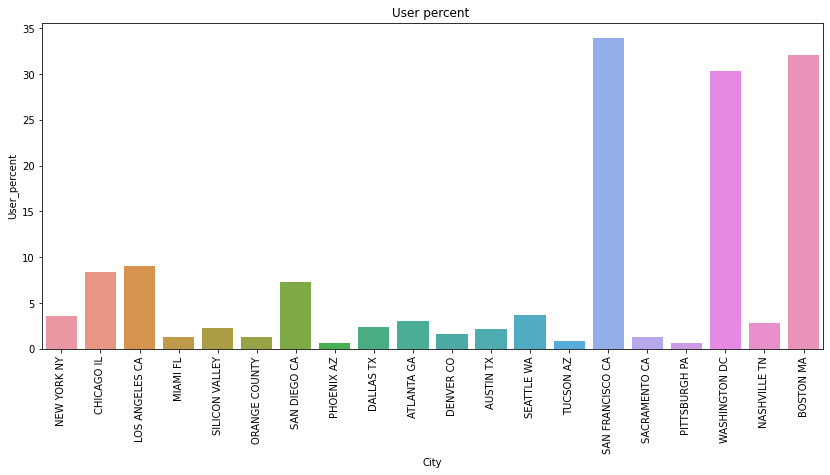

In [101]:
plt.figure(figsize=(14,6))
sns.barplot(x= citydata.City, y=citydata.User_percent)     
plt.title('User percent ')
plt.xticks(rotation=90)
plt.show()

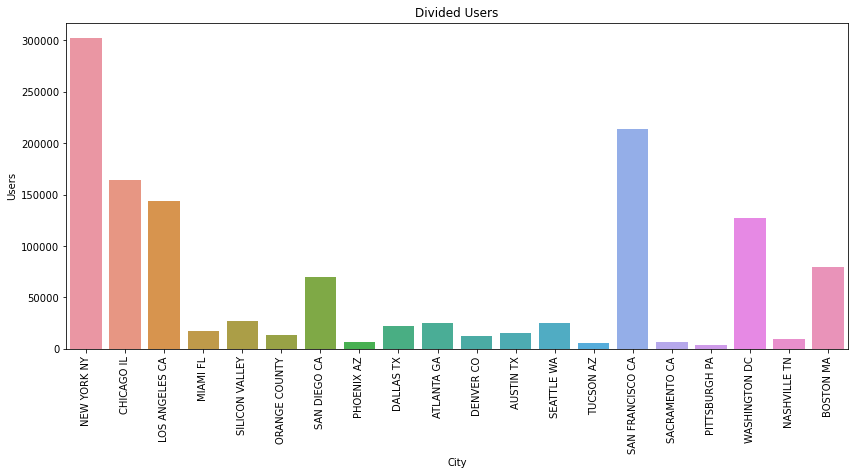

In [99]:
plt.figure(figsize=(14,6))
sns.barplot(x= citydata.City, y=citydata.Users)     
plt.title('Divided Users')
plt.xticks(rotation=90)
plt.show()

There is no relationship between users and percentage of users. The city with the most users is NEW YORK, NY, whereas the city with the most prospective users is SAN FRANCISCO, CA.

**Merge All Datasets into MasterData**

In [105]:
Master_D = cabdata.merge(Transcdata, on= 'Transaction_ID').merge(Custdata, on ='Customer_ID').merge(citydata, on = 'City')
value = 0
for column in Master_D.columns :
    value += Master_D[column].isna().sum() + Master_D[column].isnull().sum()
print('MasterData dataset has {} entries , {} features and {} missing values'.format(Master_D.shape[0] ,Master_D.shape[1] ,value))
print("\nFeature's datatypes\n\n{}".format(Master_D.dtypes))
Master_D.head(10)

MasterData dataset has 359392 entries , 19 features and 0 missing values

Feature's datatypes

Transaction_ID        int64
Company              object
City                 object
KM_Travelled        float64
Price_Charged       float64
Cost_of_Trip        float64
Year                  int64
Month                 int64
Profit              float64
ProfitPercentage    float64
Profit_per_KM       float64
Customer_ID           int64
Payment_Mode         object
Gender               object
Age                   int64
Monthly_income        int64
Population          float64
Users               float64
User_percent        float64
dtype: object


,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM,Customer_ID,Payment_Mode,Gender,Age,Monthly_income,Population,Users,User_percent
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,8,57.3150,18.274427,1.882266,29290,Card,Male,28,10813,814885.0,24701.0,3.031225
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018,7,281.2772,88.612790,10.739870,29290,Cash,Male,28,10813,814885.0,24701.0,3.031225
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018,11,194.6480,32.582415,4.574571,29290,Card,Male,28,10813,814885.0,24701.0,3.031225
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,6,23.6660,7.067558,0.826904,27703,Card,Male,27,9237,814885.0,24701.0,3.031225
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018,4,253.9808,54.371732,6.981330,27703,Card,Male,27,9237,814885.0,24701.0,3.031225
5,10324737,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,2018,4,50.8912,58.155523,8.234822,27703,Cash,Male,27,9237,814885.0,24701.0,3.031225
6,10395626,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,2018,10,25.0960,17.681458,1.874235,27703,Card,Male,27,9237,814885.0,24701.0,3.031225
7,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,2,27.5680,28.236644,3.049558,28712,Cash,Male,53,11242,814885.0,24701.0,3.031225
8,10079404,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,2016,9,210.0920,42.510846,5.305354,28712,Card,Male,53,11242,814885.0,24701.0,3.031225
9,10186994,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,2017,6,118.9736,48.234548,6.540605,28712,Card,Male,53,11242,814885.0,24701.0,3.031225


In [106]:
value = Master_D.drop(['Transaction_ID', 'Customer_ID'], axis=1)

In [108]:
label = LabelEncoder()
value["Company"] = label.fit_transform(value["Company"])
value["Gender"] = label.fit_transform(value["Gender"])
value["City"] = label.fit_transform(value["City"])
value["Payment_Mode"] = label.fit_transform(value["Payment_Mode"])
value

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM,Payment_Mode,Gender,Age,Monthly_income,Population,Users,User_percent
0,0,0,30.45,370.95,313.6350,2016,8,57.3150,18.274427,1.882266,0,1,28,10813,814885.0,24701.0,3.031225
1,1,0,26.19,598.70,317.4228,2018,7,281.2772,88.612790,10.739870,1,1,28,10813,814885.0,24701.0,3.031225
2,1,0,42.55,792.05,597.4020,2018,11,194.6480,32.582415,4.574571,0,1,28,10813,814885.0,24701.0,3.031225
3,0,0,28.62,358.52,334.8540,2016,6,23.6660,7.067558,0.826904,0,1,27,9237,814885.0,24701.0,3.031225
4,1,0,36.38,721.10,467.1192,2018,4,253.9808,54.371732,6.981330,0,1,27,9237,814885.0,24701.0,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,1,18,38.40,668.93,525.3120,2018,3,143.6180,27.339562,3.740052,1,0,29,6829,418859.0,127001.0,30.320705
359388,1,18,3.57,67.60,44.5536,2018,4,23.0464,51.727358,6.455574,1,0,29,6829,418859.0,127001.0,30.320705
359389,1,18,23.46,331.97,337.8240,2018,6,-5.8540,-1.732855,-0.249531,0,0,29,6829,418859.0,127001.0,30.320705
359390,1,18,27.60,358.23,364.3200,2018,2,-6.0900,-1.671607,-0.220652,1,0,29,6829,418859.0,127001.0,30.320705


In [109]:
rel = value.corr()
rel

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Profit,ProfitPercentage,Profit_per_KM,Payment_Mode,Gender,Age,Monthly_income,Population,Users,User_percent
Company,1.000000,0.002109,0.000333,0.227986,0.133713,-0.003287,-0.031128,0.258426,0.286510,0.331957,-0.001026,0.017279,0.000630,-0.000712,0.130920,0.180476,0.118189
City,0.002109,1.000000,0.000471,0.037286,0.000776,-0.000830,-0.005856,0.063052,0.080804,0.079695,-0.000885,-0.011733,-0.008872,-0.008725,0.000379,-0.005128,0.207573
KM_Travelled,0.000333,0.000471,1.000000,0.835753,0.981848,-0.001072,0.001033,0.462768,-0.000417,-0.000538,-0.000766,-0.001350,-0.000369,-0.000544,-0.002311,-0.000428,0.002305
Price_Charged,0.227986,0.037286,0.835753,1.000000,0.859812,-0.036409,-0.036288,0.864154,0.463584,0.473222,0.000226,0.012661,-0.003084,0.003228,0.326589,0.281061,-0.150070
Cost_of_Trip,0.133713,0.000776,0.981848,0.859812,1.000000,-0.001773,-0.002720,0.486056,0.018536,0.031053,-0.000898,0.000495,-0.000189,-0.000633,0.015108,0.023628,0.018128
Year,-0.003287,-0.000830,-0.001072,-0.036409,-0.001773,1.000000,-0.007440,-0.060567,-0.077770,-0.076459,-0.000870,-0.012758,-0.000579,-0.001617,0.000003,-0.000771,-0.003306
Month,-0.031128,-0.005856,0.001033,-0.036288,-0.002720,-0.007440,1.000000,-0.059428,-0.074669,-0.078192,-0.001861,-0.004578,-0.000095,0.000536,0.043058,0.024676,-0.040350
Profit,0.258426,0.063052,0.462768,0.864154,0.486056,-0.060567,-0.059428,1.000000,0.775171,0.779330,0.001273,0.021182,-0.005093,0.006148,0.544079,0.457758,-0.274715
ProfitPercentage,0.286510,0.080804,-0.000417,0.463584,0.018536,-0.077770,-0.074669,0.775171,1.000000,0.994458,0.002032,0.025711,-0.006606,0.008196,0.693834,0.580818,-0.356789
Profit_per_KM,0.331957,0.079695,-0.000538,0.473222,0.031053,-0.076459,-0.078192,0.779330,0.994458,1.000000,0.001932,0.026128,-0.006428,0.008159,0.700522,0.589299,-0.353537


<AxesSubplot:>

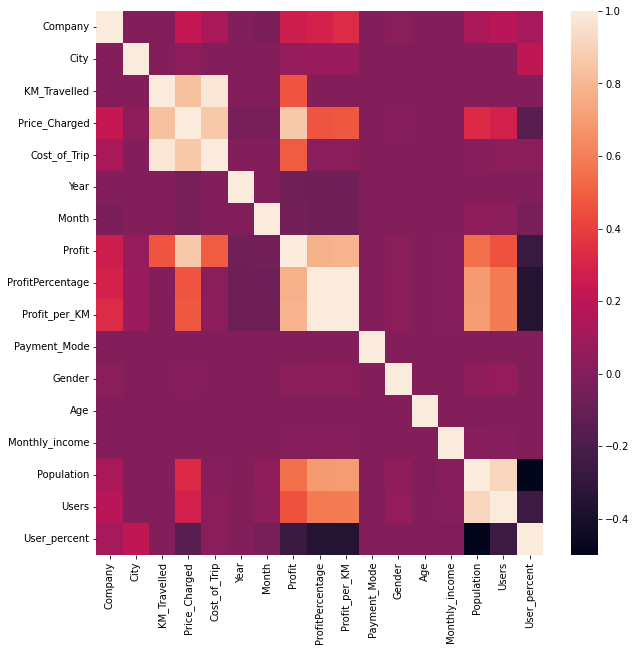

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rel, ax=ax)

List of highly correlated attributes
* KM_Travelled and Price_Charged
* KM_Travelled and Cost_of_Trip
* Price_Charged and Cost_of_Trip
* Profit and ProfitPercentage

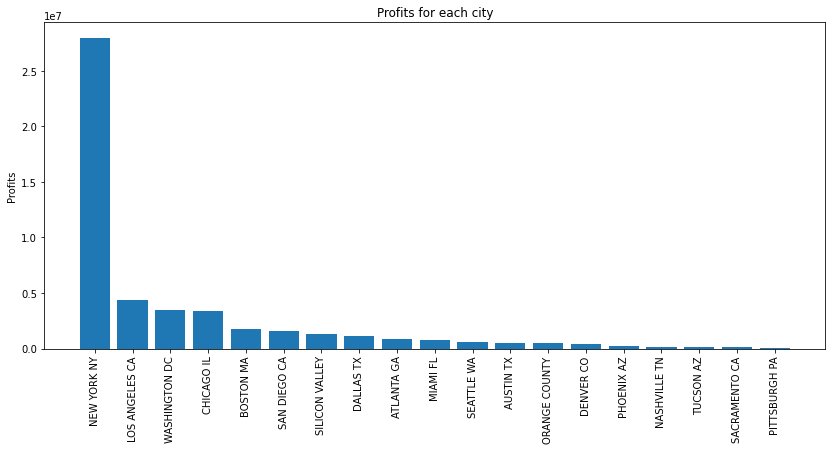

                   Profits
City                      
NEW YORK NY     27962555.0
LOS ANGELES CA   4411709.0
WASHINGTON DC    3492870.0
CHICAGO IL       3387313.0
BOSTON MA        1768719.0
SAN DIEGO CA     1587163.0
SILICON VALLEY   1316705.0
DALLAS TX        1128733.0
ATLANTA GA        842433.0
MIAMI FL          758301.0
SEATTLE WA        604685.0
AUSTIN TX         526701.0
ORANGE COUNTY     457002.0
DENVER CO         397585.0
PHOENIX AZ        192941.0
NASHVILLE TN      149532.0
TUCSON AZ         140261.0
SACRAMENTO CA     117326.0
PITTSBURGH PA      85166.0


In [116]:
price = np.array(cabdata["Price_Charged"])
cost = np.array(cabdata["Cost_of_Trip"])
profit = np.subtract(price,cost)
new = zip(cabdata["City"],profit)
profit_df = (pd.DataFrame(new,columns = ["City","Profits"]).groupby("City").sum()).sort_values(by = "Profits",ascending=False)
new_df = profit_df.round()

plt.figure(figsize = (14,6))
plt.bar(new_df.index,new_df.Profits)
plt.xticks(rotation="90")
plt.ylabel("Profits")
plt.title("Profits for each city")
plt.show()

print(new_df)

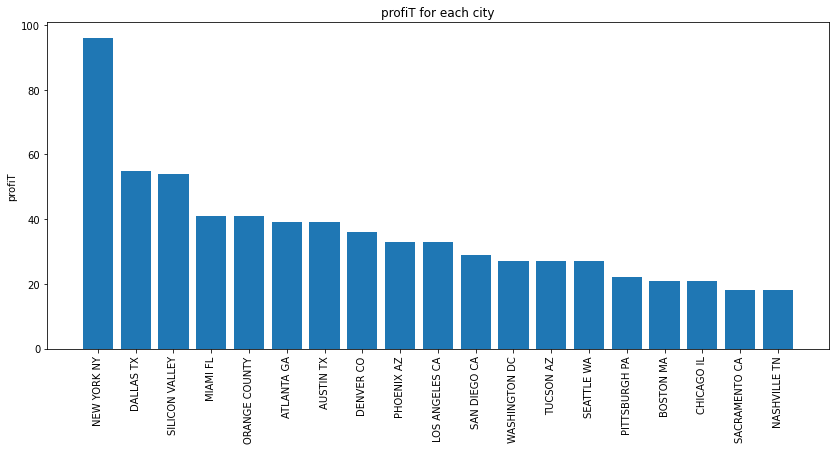

                profiT
City                  
NEW YORK NY       96.0
DALLAS TX         55.0
SILICON VALLEY    54.0
MIAMI FL          41.0
ORANGE COUNTY     41.0
ATLANTA GA        39.0
AUSTIN TX         39.0
DENVER CO         36.0
PHOENIX AZ        33.0
LOS ANGELES CA    33.0
SAN DIEGO CA      29.0
WASHINGTON DC     27.0
TUCSON AZ         27.0
SEATTLE WA        27.0
PITTSBURGH PA     22.0
BOSTON MA         21.0
CHICAGO IL        21.0
SACRAMENTO CA     18.0
NASHVILLE TN      18.0


In [118]:
profiT = np.array(cabdata["ProfitPercentage"])
new = zip(cabdata["City"],profiT)
profit_df = (pd.DataFrame(new,columns = ["City","profiT"]).groupby("City").mean()).sort_values(by = "profiT",ascending=False)
new_df = profit_df.round()

plt.figure(figsize = (14,6))
plt.bar(new_df.index,new_df.profiT)
plt.xticks(rotation="90")
plt.ylabel("profiT")
plt.title("profiT for each city")
plt.show()

print(new_df)

The graphs above depict the trend in city profits and profit percentages.

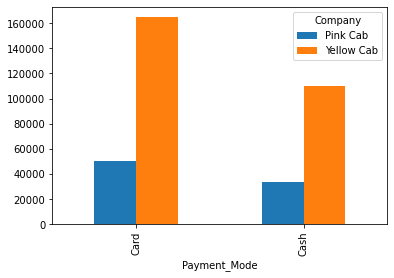

Company       Pink Cab  Yellow Cab
Payment_Mode                      
Card             50719      164785
Cash             33992      109896


In [113]:
numbers = Master_D.groupby(['Payment_Mode','Company']).Transaction_ID.count().unstack()
ax = numbers.plot(kind='bar',stacked = False)
plt.show()
print(numbers)

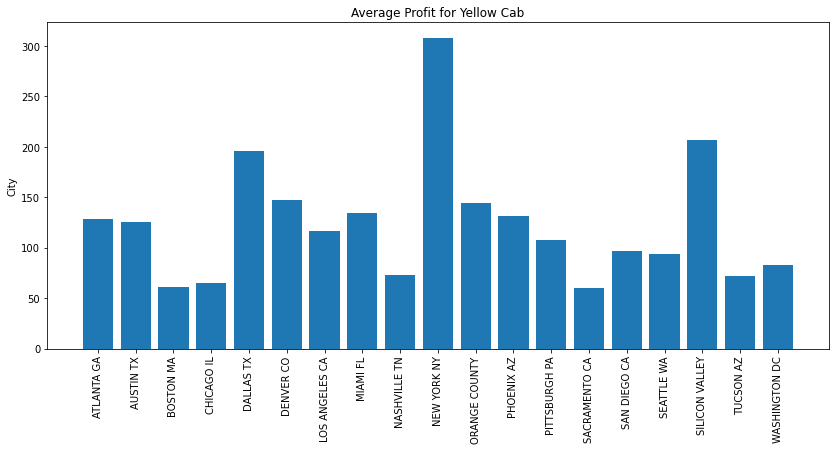

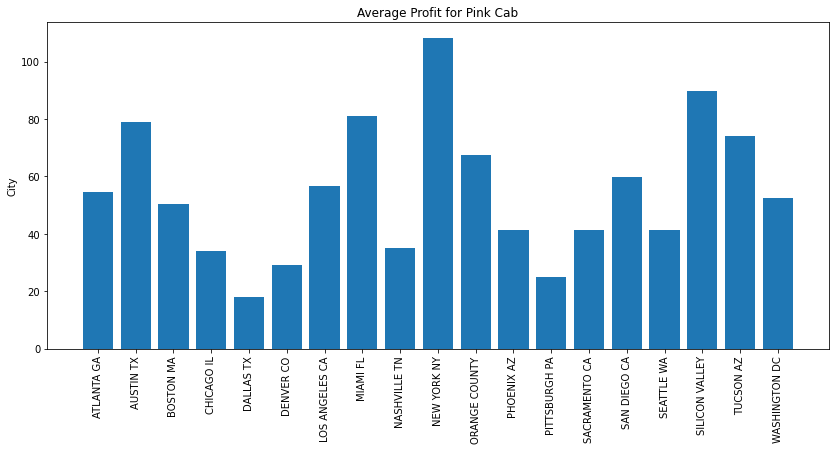

In [119]:
yellow = Master_D[Master_D.Company.isin(['Yellow Cab'])]
pink = Master_D[Master_D.Company.isin(['Pink Cab'])]
number= yellow.groupby(['City']).Profit.mean()
y_new = (yellow.groupby("City").mean())
plt.figure(figsize = (14,6))
plt.bar(y_new.index,y_new["Profit"])
plt.xticks(rotation="90")
plt.ylabel("City")
plt.title("Average Profit for Yellow Cab")
plt.show()

number = pink.groupby(['City']).Profit.mean()
p_new = (pink.groupby("City").mean())
plt.figure(figsize = (14,6))
plt.bar(p_new.index,p_new["Profit"])
plt.xticks(rotation="90")
plt.ylabel("City")
plt.title("Average Profit for Pink Cab")
plt.show()

The graphs above depict the trend in profits and profit percentages by city.